# Introduction

**Welcome to my SQL-focused data analytics project!**  
In this notebook, we'll dive into the daily grind of a coffee shop's sales data and extract meaningful insights using **duckdb** and **SQL**.

The goal of this project is to simulate a real-world business scenario — analyzing customer behavior and product demand using **duckdb** data querying. By combining **SQL for analysis** and **Python for light preprocessing and visualization**, this project aims to showcase my ability to work across the data pipeline.

Along the way, we’ll answer some insightful questions by writing clean, efficient SQL queries and turning raw data into actionable business intelligence — with a sprinkle of visual storytelling.

Whether you're a fellow data enthusiast, a recruiter, or just someone who loves coffee and numbers — I hope you find this notebook both informative and engaging.

> ☕ Let’s brew some data magic!

![Coffee Image](https://www.americanolounge.com/wp-content/uploads/2024/08/What-is-American-style-coffee_270222935.webp)


[![GitHub](https://img.shields.io/badge/GitHub-arkam429-informational?logo=github&style=for-the-badge)](https://github.com/arkam429)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-arkam--shahid-blue?logo=linkedin&style=for-the-badge)](https://www.linkedin.com/in/arkam-shahid-916a50260)


# 🧰 Columns Description
**Column:** What it means
**date** Transaction date (YYYY/MM/DD)
**datetime:** Exact timestamp of the transaction
**cash_type:** Payment method (card or cash)
**card:** Anonymized customer ID (card-based loyalty)
**money:** Amount spent per transaction (in South African Rand)
**coffee_name:** Type of coffee purchased

# Setting up the enviroment
To begin, we’ll set up the environment and import the dataset for analysis

In [22]:
!pip install duckdb

In [23]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# i am going to use duckdb for my quries
import duckdb

In [24]:
df = pd.read_excel("/kaggle/input/coffee-sales/Coffe_sales.xlsx")
df.to_csv("my_file.csv", index =False)
os.listdir()
print(df.columns)

Index(['date', 'datetime', 'hour_of_day', 'cash_type', 'card', 'money',
       'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort',
       'Monthsort'],
      dtype='object')


In [25]:
# test run.....
duckdb.query('''
select date from df
''').df()

,date
0,2024-03-01
1,2024-03-01
2,2024-03-01
3,2024-03-01
4,2024-03-01
...,...
3631,2025-03-23
3632,2025-03-23
3633,2025-03-23
3634,2025-03-23


**Now that we have our dataset loaded and our SQL environment ready with DuckDB, it's time to explore some interesting business questions using SQL queries. These queries will help uncover key insights into product performance, customer behavior, and sales trends. Let’s jump right into it**

# 1. Data cleaning...


In [26]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3547 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3


seems good moving on

In [27]:
df.isnull().sum()
df.duplicated().sum()


# Clean 'Product', 'cash_type', and 'hour_of_the_day' columns: strip spaces and apply title case
col_cleaned =[ 'cash_type','coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']

for col in col_cleaned:
    df[col] =df[col].str.strip().str.title()
df[['cash_type','coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']].head(5)    

,cash_type,coffee_name,Time_of_Day,Weekday,Month_name
0,Card,Latte,Morning,Fri,Mar
1,Card,Hot Chocolate,Afternoon,Fri,Mar
2,Card,Hot Chocolate,Afternoon,Fri,Mar
3,Card,Americano,Afternoon,Fri,Mar
4,Card,Latte,Afternoon,Fri,Mar


In [28]:
df['card'] = df['card'].fillna('paid in cash')
df['card'].head(20)

0     ANON-0000-0000-0001
1     ANON-0000-0000-0002
2     ANON-0000-0000-0002
3     ANON-0000-0000-0003
4     ANON-0000-0000-0004
5     ANON-0000-0000-0005
6     ANON-0000-0000-0006
7     ANON-0000-0000-0007
8     ANON-0000-0000-0008
9     ANON-0000-0000-0008
10    ANON-0000-0000-0009
11    ANON-0000-0000-0010
12           paid in cash
13    ANON-0000-0000-0011
14    ANON-0000-0000-0012
15    ANON-0000-0000-0013
16    ANON-0000-0000-0014
17    ANON-0000-0000-0004
18           paid in cash
19    ANON-0000-0000-0015
Name: card, dtype: object

# 2. Product performance
in this we will try to understand what sells well and how product sales vary.

# 2.1 What are the top 5 best-selling coffee products by quantity?

In [29]:
best_5_selling_coffee = duckdb.query('''
select coffee_name,count(*) as quantity from df
group by coffee_name
order by quantity desc
limit 5
''').df()
best_5_selling_coffee

,coffee_name,quantity
0,Americano With Milk,824
1,Latte,782
2,Americano,578
3,Cappuccino,501
4,Cortado,292


From the analysis, we observe that **Americano with Milk** is the most frequently purchased item, with a total of **824 units sold**.
Latte takes the second spot, followed closely by Americano, securing third place.

This trend suggests that customers prefer straightforward, classic coffee options, particularly variations of Americano — both with and without milk

Text(0, 0.5, 'Quantity')

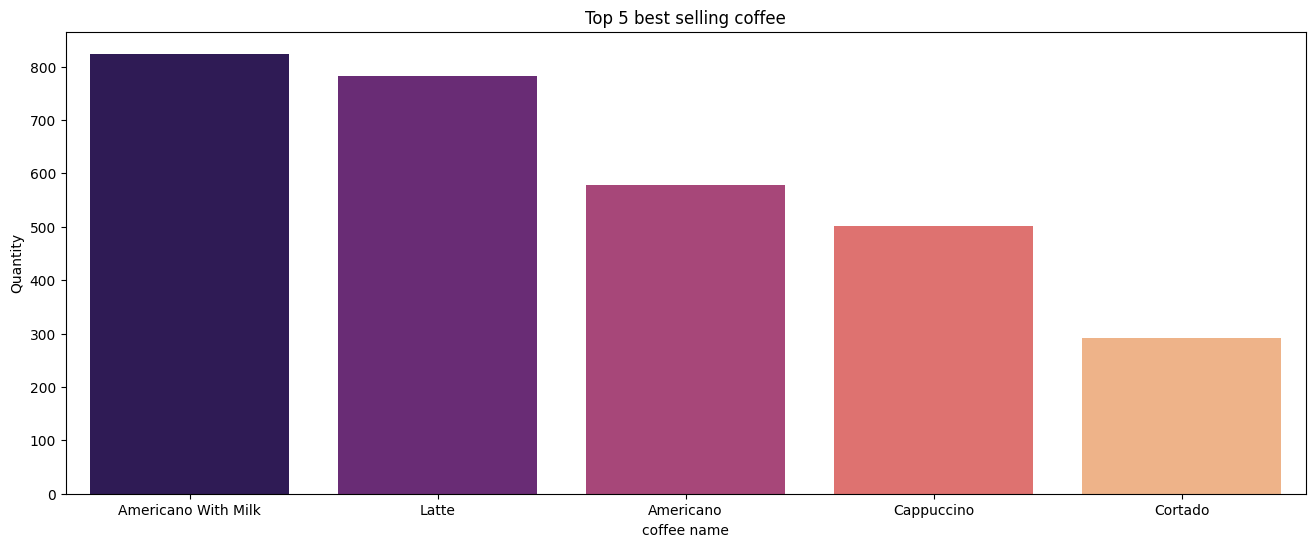

In [30]:
plt.figure(figsize=(16,6))
sns.barplot(data=best_5_selling_coffee,x ='coffee_name',y='quantity',palette='magma')
plt.title('Top 5 best selling coffee')
plt.xlabel("coffee name")
plt.ylabel('Quantity')

# 2.2 Which product generated the highest total revenue?

In [31]:
product_highest_total_revenue = duckdb.query('''
select coffee_name, round(sum(money),2) as total_revenue from df
group by coffee_name
order by total_revenue desc

''').df()
product_highest_total_revenue

,coffee_name,total_revenue
0,Latte,27866.30
1,Americano With Milk,25269.12
2,Cappuccino,18034.14
3,Americano,15062.26
4,Hot Chocolate,10172.46
5,Cocoa,8678.16
6,Cortado,7534.86
7,Espresso,2814.28


**Despite not being the top in quantity, Latte generated the highest total revenue, indicating a higher price point or larger sizes being frequently purchased.**

# 2.3 Are there any products that have low sales across monthly time periods?

In [32]:
# low_sales_monthly = duckdb.query('''
# with monthly_sales as (
# select coffee_name,month_name,count(*) as monthly_sales from df
# group by coffee_name,month_name
# )
# select * from monthly_sales
# ''').df()

low_sales_monthly = duckdb.query('''
with monthly_sales as (
select coffee_name,month_name,count(*) as monthly_sales from df
group by coffee_name,month_name
),
max_sales as (
select coffee_name, max(monthly_sales) as max_monthly_sales from monthly_sales
group by coffee_name
)
select * from max_sales
where max_monthly_sales < 50
''').df()
low_sales_monthly

,coffee_name,max_monthly_sales
0,Cortado,41
1,Espresso,20


Based on the query results, **Cortado and Espresso** have the lowest maximum monthly sales among all coffee products, **with 41 and 20** units respectively. This indicates that these items consistently underperform compared to others and are among the **least favored options across all months**

# 3.  Customer Purchasing Behavior
How, when, and what customers tend to buy.

# 3.1 What time of day sees the highest number of transactions?

In [33]:
best_selling_time = duckdb.query('''
select Time_of_Day, count(*) as number_of_unit_sold from df
group by time_of_day
order by number_of_unit_sold desc
''').df()
best_selling_time

,Time_of_Day,number_of_unit_sold
0,Afternoon,1231
1,Morning,1221
2,Night,1184


As we can see, the **Afternoon time slot records the highest number** of coffee units sold, slightly more than the Morning.

This is somewhat surprising, as coffee consumption is traditionally associated with mornings. A possible explanation could be that **a large portion of the customer base comprises office-goers**, who prefer grabbing coffee during their lunch breaks or afternoon slumps for a quick boost

# 3.2 Do customers prefer cash or card payments more often?
how often does customers prefer card over cash or vice versa....

In [34]:
card_and_cash = duckdb.query('''
select cash_type, count(*) as number_of_transaction from df
group by cash_type
order by number_of_transaction desc
''').df()
card_and_cash


,cash_type,number_of_transaction
0,Card,3547
1,Cash,89


<Axes: xlabel='cash_type', ylabel='number_of_transaction'>

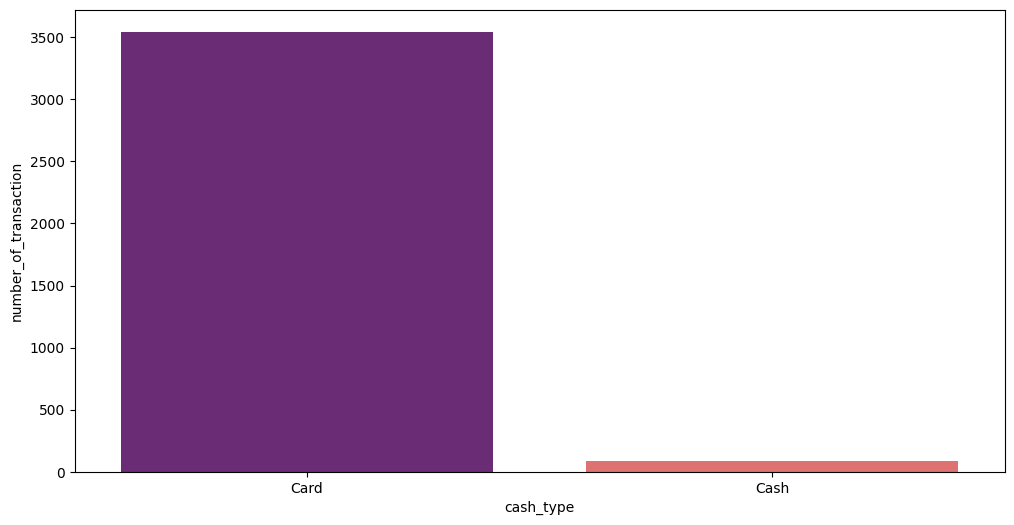

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(data = card_and_cash,x = 'cash_type',y= 'number_of_transaction',palette = 'magma')

As we can clearly see, **card payments overwhelmingly dominate**, with a total of **3,547** transactions compared to just **89** cash transactions.
This indicates a strong customer preference for card payments, possibly due to convenience, digital trends, or the environment of the shop (e.g., office area, urban clientele)

# 3.3 Do customers show a clear payment preference (Card vs Cash) for different coffee products?
finding the payment prefrence for diffrent products

In [36]:
payment_prefrence = duckdb.query('''
select coffee_name,sum(case when cash_type='Card' then 1 end) as card_prefrence,
    sum(case when cash_type ='Cash' then 1 end) as cash_prefrence
    from df
    group by coffee_name
    order by card_prefrence desc 
''').df()
payment_prefrence

,coffee_name,card_prefrence,cash_prefrence
0,Americano With Milk,809.0,15.0
1,Latte,757.0,25.0
2,Americano,564.0,14.0
3,Cappuccino,486.0,15.0
4,Cortado,287.0,5.0
5,Hot Chocolate,276.0,6.0
6,Cocoa,239.0,4.0
7,Espresso,129.0,5.0


Customers **overwhelmingly prefer card payments across all products**.
Even for the most popular items like Latte and Americano With Milk, card usage is significantly higher than cash.
This could reflect broader trends in customer behavior, such as:

Convenience and speed of digital transactions

Possibly limited or discouraged cash handling at the shop

A target audience that is digitally savvy (e.g., office workers, urban customers)

# 4 Seasonal & Weekly Trends
in this unit we will focus on trends that occur weekly or seasosnaly


# 4.1 How do sales volumes vary by weekday, and are there specific days with consistently higher sales across product categories?

In [37]:
sales_by_weekday = duckdb.query('''
select coffee_name,weekday,count(*) as num_of_coffee ,
rank() over(partition by weekday order by num_of_coffee) as rank,
case
    when weekday = 'Mon' then 1
    when weekday = 'Tue' then 2
    when weekday = 'Wed' then 3
    when weekday = 'Thu' then 4
    when weekday = 'Fri' then 5
    when weekday = 'Sat' then 6
    when weekday = 'Sun' then 7
    end as weekday_sort
    
from df
group by coffee_name,weekday
order by weekday_sort,rank
''').df()
sales_by_weekday

,coffee_name,Weekday,num_of_coffee,rank,weekday_sort
0,Espresso,Mon,12,1,1
1,Cocoa,Mon,34,2,1
2,Hot Chocolate,Mon,35,3,1
3,Cortado,Mon,36,4,1
4,Cappuccino,Mon,74,5,1
5,Americano,Mon,98,6,1
6,Americano With Milk,Mon,132,7,1
7,Latte,Mon,140,8,1
8,Espresso,Tue,16,1,2
9,Cortado,Tue,45,2,2


Text(0.5, 0, 'coffee_name')

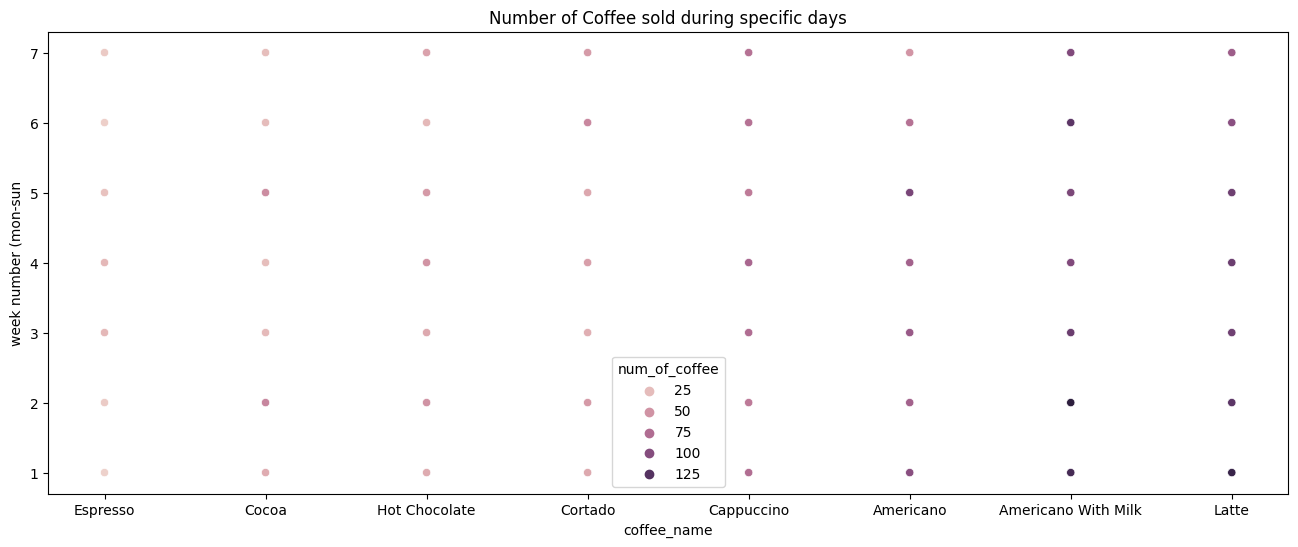

In [38]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=sales_by_weekday['coffee_name'],y=sales_by_weekday['weekday_sort']
               ,hue=sales_by_weekday['num_of_coffee'])
plt.title('Number of Coffee sold during specific days')
plt.ylabel('week number (mon-sun')
plt.xlabel('coffee_name')

**As observed from the data, "Americano With Milk" and "Latte" consistently dominate sales across all weekdays, making them the most popular choices throughout the week.**

On the other hand, **"Espresso" remains the least consumed product**, ranking lowest in sales on nearly every day. This pattern suggests a strong and stable customer preference for milder or milk-based coffee options over stronger, concentrated types like espresso

# 4.2 Which month generates the highest revenue, and does the revenue composition by product type shift significantly over the months?

In [39]:
sales_by_month = duckdb.query('''
select coffee_name,Month_name, count(*) as num_of_coffee,
rank() over(partition by Month_name order by num_of_coffee) as rank,
case 
    when Month_name = 'Jan' then 1
    when Month_name = 'Feb' then 2
    when Month_name = 'Mar' then 3
    when Month_name = 'Apr' then 4
    when Month_name = 'May' then 5
    when Month_name = 'Jun' then 6
    when Month_name = 'Jul' then 7
    when Month_name = 'Aug' then 8
    when Month_name = 'Sep' then 9
    when Month_name = 'Oct' then 10
    when Month_name = 'Nov' then 11
    when Month_name = 'Dec' then 12
    end as month_sort
from df
    group by coffee_name,Month_name
    order by month_sort,rank desc
''').df()
sales_by_month

,coffee_name,Month_name,num_of_coffee,rank,month_sort
0,Americano With Milk,Jan,52,8,1
1,Latte,Jan,41,7,1
2,Cappuccino,Jan,27,6,1
3,Americano,Jan,25,5,1
4,Cortado,Jan,22,4,1
...,...,...,...,...,...
91,Cortado,Dec,31,5,12
92,Americano,Dec,27,4,12
93,Hot Chocolate,Dec,26,3,12
94,Cocoa,Dec,21,2,12


# 4.3 Month-wise Top and Bottom Product Sold in Respective Months

In [40]:
# register to pandas DataFrame so DuckDB can query it by name
duckdb.register('sales_by_month',sales_by_month)

In [41]:
top_bottom_permonth = duckdb.query('''
with ranked as(
select coffee_name,Month_name,num_of_coffee	,month_sort,
rank() over(partition by Month_name order by num_of_coffee desc) as top_rank,
rank() over(partition by Month_name order by num_of_coffee ) as bottom_rank
from sales_by_month
)select Month_name,
    max(case when top_rank = 1 then coffee_name end) as top_product,
    max(case when top_rank = 1 then num_of_coffee end) as top_quantity,
    max(case when bottom_rank = 1 then coffee_name end) as bottom_product,
    max(case when bottom_rank = 1 then num_of_coffee end) as bottom_quantity,
    month_sort
    from ranked
    group by Month_name,month_sort
    order by month_sort
''').df()
top_bottom_permonth

,Month_name,top_product,top_quantity,bottom_product,bottom_quantity,month_sort
0,Jan,Americano With Milk,52,Espresso,5,1
1,Feb,Americano,117,Cortado,10,2
2,Mar,Americano,138,Espresso,20,3
3,Apr,Cappuccino,43,Cocoa,6,4
4,May,Latte,58,Espresso,8,5
5,Jun,Americano With Milk,69,Cocoa,5,6
6,Jul,Americano With Milk,65,Cocoa,9,7
7,Aug,Americano With Milk,72,Hot Chocolate,6,8
8,Sep,Americano With Milk,104,Cocoa,9,9
9,Oct,Latte,120,Espresso,12,10


# 5 Trend & Growth Analysis

# 5.1 What is the CAGR (Compound Annual Growth Rate) of revenue or customers?

In [44]:
revenue_by_year =  duckdb.query('''
select extract(year from date) as year,
sum(money) as total_revenue
from df
group by year
order by year
''').df()
revenue_by_year

,year,total_revenue
0,2024,85830.80
1,2025,29600.78


In [58]:
CSGR = duckdb.query('''
with yearly as (
    select 
        extract(year from date) as year,
        sum(money) as total_revenue
    from df
    group by year
)
select 
    first_value(total_revenue) over (order by year rows between unbounded preceding and unbounded following) as start_value,
    last_value(total_revenue)  over (order by year rows between unbounded preceding and unbounded following)  as end_value,
    (max(year) over() - min(year) over()) as num_years,
    round(
        power(
            1.0 * last_value(total_revenue) over (order by year rows between unbounded preceding and unbounded following)
            / first_value(total_revenue) over (order by year rows between unbounded preceding and unbounded following),
            1.0 / (max(year) over() - min(year) over())
        ) - 1,
        4
    ) as cagr
from yearly

limit 1;
''').df()

CSGR


,start_value,end_value,num_years,cagr
0,85830.8,29600.78,1,-0.6551


**The revenue declined by ~65.51% from the previous year (₹85,830.8 → ₹29,600.78). This significant drop suggests a major slowdown in sales, highlighting the need for further investigation into factors such as seasonality, product performance, or customer behavior.**

# 5.2 Revenue by Coffee trend

In [63]:
coffee_trend = duckdb.query('''
with monthly_revenue as (
select coffee_name,
extract(year from date) as year,
extract(month from date) as month,
sum(money) as revenue
from df
group by coffee_name,year,month
),
ranked as (
select *,
row_number() over(partition by coffee_name order by revenue desc) as rn
from monthly_revenue
)
select coffee_name,year,month,revenue
from ranked
where rn = 1
order by coffee_name
''').df()
coffee_trend

,coffee_name,year,month,revenue
0,Americano,2025,2,3037.32
1,Americano With Milk,2024,9,2930.14
2,Cappuccino,2024,5,2078.44
3,Cocoa,2025,2,2002.56
4,Cortado,2024,9,961.46
5,Espresso,2025,2,358.02
6,Hot Chocolate,2024,10,2074.08
7,Latte,2024,10,4291.20



**Peak months differ per coffee type — e.g., Latte and Hot Chocolate peaked in October, while Americano peaked in February.Revenue potential varies — Latte’s highest month revenue (4291.20) is much higher than Espresso’s (358.02), indicating product popularity differences.Seasonality hints — Some coffees peak in colder months (Hot Chocolate, Latte), while others peak earlier in the year (Americano)**


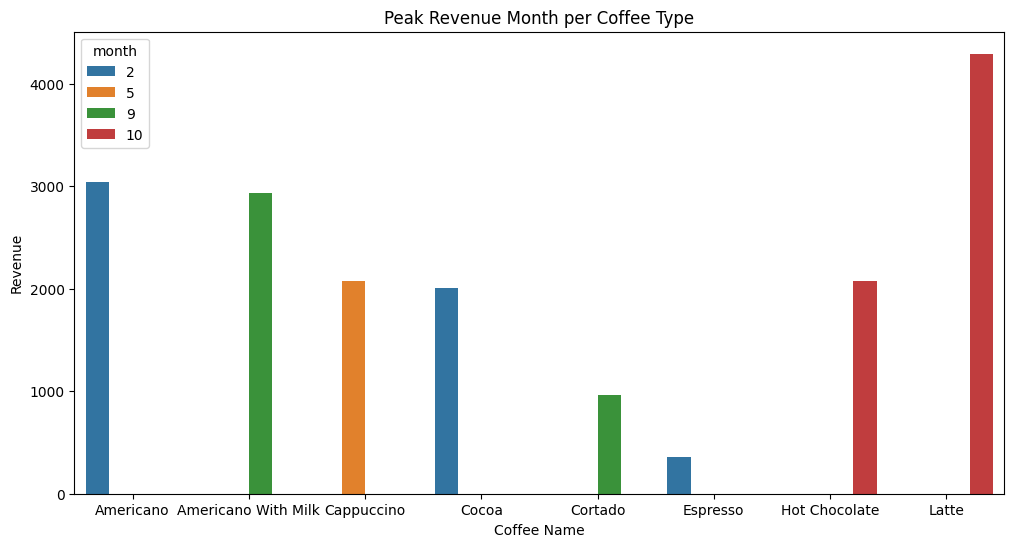

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(data=coffee_trend, x='coffee_name', y='revenue', hue='month')
plt.title('Peak Revenue Month per Coffee Type')
plt.ylabel('Revenue')
plt.xlabel('Coffee Name')
plt.show()

# Conclusion....

**In this project, I analyzed coffee shop sales data to demonstrate various SQL queries aimed at understanding trends, consumer behavior, and product performance across different times of day, months, and years. I explored revenue patterns, identifying which products performed best and when, and also examined customer payment preferences, weekly trends, and seasonal effects. Through data cleaning and preparation, I ensured the dataset was easy to access and use for analysis. Additionally, visualizations were created to provide a clear understanding of relationships and patterns in the data. Overall, this project highlights actionable insights for better business decision-making and a deeper understanding of coffee shop performance over time.**